In [13]:
import numpy as np
import math

mu=15  #Barrier Parameter

#Time parameters
N=1000 #Number of time steps
T=0.5 #Final Time
t=np.linspace(0,T,N+1,endpoint=True) #Time grid
dt=T/N #dt

#K
thetamin=0.9
alpha=1
K=(1-alpha*thetamin)/-(alpha*thetamin)

#s1,s2
s1=1
s2=1

#Inverse demand function
m1=0.5
m2=0.5
n1=1
n2=3

def CalcABCD(x1,x2,y1,y2,t):
    a1=-m1
    a2=-m2
    b1=np.exp(-n1*x1)
    b2=np.exp(-n2*x2)
    c1=1-m1*t
    c2=1-m2*t
    d1=-n1*b1
    d2=-n2*b2
    
    derd1=-n1*d1
    derd2=-n2*d2
   
    return a1,a2,b1,b2,c1,c2,d1,d2,derd1,derd2
    

def CalcLElementwise(x1,x2,y1,y2,t):
    a1,a2,b1,b2,c1,c2,d1,d2,derd1,derd2=CalcABCD(x1,x2,y1,y2,t)
    L1i=(K*a1*b1*(s1-x1)+K*a2*b2*(s2-x2))/(y1-K*c1*d1*(s1-x1))
    L2i=(-y2+K*c2*d2*(s2-x2))/(y1-K*c1*d1*(s1-x1))
    L3i=(y1*a1*b1+K*a2*b2*c1*d1*(s2-x2))/(y1-K*c1*d1*(s1-x1))
    L4i=c1*d1*(-y2+K*c2*d2*(s2-x2))/(y1-K*c1*d1*(s1-x1))
    L5i=a2*b2
    L6i=c2*d2
    
    return L1i,L2i,L3i,L4i,L5i,L6i

def CalcdLdx1(x1,x2,y1,y2,m):
    a1,a2,b1,b2,c1,c2,d1,d2,derd1,derd2=CalcABCD(x1,x2,y1,y2,m)
    D=y1-K*c1*d1*(s1-x1)
    
    
    NdL1dx1=(K*a1*b1*(-1)+K*a1*d1*(s1-x1))*D-(K*a1*b1*(s1-x1)+K*a2*b2*(s2-x2))*(-K*c1*d1*(-1)-K*c1*derd1*(s1-x1))
    dL1dx1=NdL1dx1/math.pow(D,2)
    
    
    NdL2dx1=-(-y2+K*c2*d2*(s2-x2))*(-K*c1*d1*(-1)-K*c1*derd1*(s1-x1))
    dL2dx1=NdL2dx1/math.pow(D,2)
    
    NdL3dx1=(y1*a1*d1+K*a2*b2*c1*derd1*(s2-x2))*D-(y1*a1*b1+K*a2*b2*c1*d1*(s2-x2))*(-K*c1*d1*(-1)-K*c1*derd1*(s1-x1))
    dL3dx1=NdL3dx1/math.pow(D,2)
    
    NdL4dx1=(c1*derd1*(-y2+K*c2*d2*(s2-x2)))*D-(c1*d1*(-y2+K*c2*d2*(s2-x2)))*(-K*c1*d1*(-1)-K*c1*derd1*(s1-x1))
    dL4dx1=NdL4dx1/math.pow(D,2)
    
    return dL1dx1,dL2dx1,dL3dx1,dL4dx1


def CalcdLdx2(x1,x2,y1,y2,m):
    a1,a2,b1,b2,c1,c2,d1,d2,derd1,derd2=CalcABCD(x1,x2,y1,y2,m)
    D=y1-K*c1*d1*(s1-x1)
    
    dL1dx2=(K*a2*d2*(s2-x2)+K*a2*b2*(-1))/D
    dL2dx2=(K*c2*derd2*(s2-x2)+K*c2*d2*(-1))/D
    dL3dx2=K*c1*d1*a2*(b2*(-1)+d2*(s2-x2))/D
    dL4dx2=K*c1*d1*c2*(d2*(-1)+derd2*(s2-x2))/D
    dL5dx2=a2*d2
    dL6dx2=c2*derd2
    
    return dL1dx2,dL2dx2,dL3dx2,dL4dx2,dL5dx2,dL6dx2


def CalcdLdy1(x1,x2,y1,y2,m):
    a1,a2,b1,b2,c1,c2,d1,d2,derd1,derd2=CalcABCD(x1,x2,y1,y2,m)
    D=y1-K*c1*d1*(s1-x1) 
    
    dL1dy1=-(K*a1*b1*(s1-x1)+K*a2*b2*(s2-x2))/math.pow(D,2)
    dL2dy1=-(-y2+K*c2*d2*(s2-x2))/math.pow(D,2)
    dL3dy1=((a1*b1)*D-(y1*a1*b1+K*a2*b2*c1*d1*(s2-x2)))/math.pow(D,2)
    dL4dy1=-c1*d1*(-y2+K*c2*d2*(s2-x2))/math.pow(D,2)
    
    return dL1dy1,dL2dy1,dL3dy1,dL4dy1


def CalcdLdy2(x1,x2,y1,y2,m):
    a1,a2,b1,b2,c1,c2,d1,d2,derd1,derd2=CalcABCD(x1,x2,y1,y2,m)
    D=y1-K*c1*d1*(s1-x1) 
    
    dL2dy2=-1/D
    dL4dy2=-c1*d1/D
    
    return dL2dy2,dL4dy2


def CalcL(x1,x2,y1,y2):
    L1=np.zeros((N+1,1))
    L2=np.zeros((N+1,1))
    L3=np.zeros((N+1,1))
    L4=np.zeros((N+1,1))
    L5=np.zeros((N+1,1))
    L6=np.zeros((N+1,1))
    
    for i in range((N+1,1)):
        m=t[i]
        L1[i],L2[i],L3[i],L4[i],L5[i],L6[i]=CalcLElementwise(x1,x2,y1,y2,m)
        
    return L1,L2,L3,L4,L5,L6
        
    
    
def Calcu(x1,x2,y1,y2,p1,p2,p3,p4):
    u=np.zeros((N+1,1))
    
    
    for i in range(N+1):
        
        m=t[i]
        L1,L2,L3,L4,L5,L6=CalcLElementwise(x1[i],x2[i],y1[i],y2[i],m)
        u[i]=(-2*L1*L2*mu-p1[i]*L2-p2[i]-p3[i]*L4-p4[i]*L6)/(2*mu*(math.pow(L2,2)+1))
        
    return u
    
   

def CalcFDE(u):
    x1=np.zeros((N+1,1))
    x2=np.zeros((N+1,1))
    y1=np.zeros((N+1,1))
    y2=np.zeros((N+1,1))
    y1[0]=1
    y2[0]=1
    
    for i in range(N):
        k=i+1
        m=t[i]
        
        #K1
        L1iK1,L2iK1,L3iK1,L4iK1,L5iK1,L6iK1=CalcLElementwise(x1[i],x2[i],y1[i],y2[i],m)
        K1_x1=L1iK1+u[i]*L2iK1
        K1_x2=u[i]
        K1_y1=L3iK1+u[i]*L4iK1
        K1_y2=L5iK1+u[i]*L6iK1
        
        #K2
        L1iK2,L2iK2,L3iK2,L4iK2,L5iK2,L6iK2=CalcLElementwise(x1[i]+dt*K1_x1/2,x2[i]+dt*K1_x2/2,y1[i]+dt*K1_y1/2,y2[i]+dt*K1_y1/2,m+dt/2)
        K2_x1=L1iK2+(u[i]+u[k])*L2iK2/2
        K2_x2=(u[i]+u[k])/2
        K2_y1=L3iK2+(u[i]+u[k])*L4iK2/2
        K2_y2=L5iK2+(u[i]+u[k])*L6iK2/2
        
        #K3
        L1iK3,L2iK3,L3iK3,L4iK3,L5iK3,L6iK3=CalcLElementwise(x1[i]+dt*K2_x1/2,x2[i]+dt*K2_x2/2,y1[i]+dt*K2_y1/2,y2[i]+dt*K2_y1/2,m+dt/2)
        K3_x1=L1iK3+(u[i]+u[k])*L2iK3/2
        K3_x2=(u[i]+u[k])/2
        K3_y1=L3iK3+(u[i]+u[k])*L4iK3/2
        K3_y2=L5iK3+(u[i]+u[k])*L6iK3/2
        
        #K4
        L1iK4,L2iK4,L3iK4,L4iK4,L5iK4,L6iK4=CalcLElementwise(x1[i]+dt*K3_x1,x2[i]+dt*K3_x2,y1[i]+dt*K3_y1,y2[i]+dt*K3_y1,m+dt)
        K4_x1=L1iK4+u[k]*L2iK4
        K4_x2=u[k]
        K4_y1=L3iK4+u[k]*L4iK4
        K4_y2=L5iK4+u[k]*L6iK4
        
        
        x1[k]=x1[i]+(dt/6)*(K1_x1+2*K2_x1+2*K3_x1+K4_x1)
        x2[k]=x2[i]+(dt/6)*(K1_x2+2*K2_x2+2*K3_x2+K4_x2)
        y1[k]=y1[i]+(dt/6)*(K1_y1+2*K2_y1+2*K3_y1+K4_y1)
        y2[k]=y2[i]+(dt/6)*(K1_y2+2*K2_y2+2*K3_y2+K4_y2)
        
    
    return x1,x2,y1,y2

def CalcBDE(u,x1,x2,y1,y2):
    p1=np.zeros((N+1,1))
    p2=np.zeros((N+1,1))
    p3=np.zeros((N+1,1))
    p4=np.zeros((N+1,1))
    
    for i in range(N,0,-1):
        k=i-1
        m=t[i]
        
        #K1
        L1iK1,L2iK1,L3iK1,L4iK1,L5iK1,L6iK1=CalcLElementwise(x1[i],x2[i],y1[i],y2[i],m)
        dL1dx1_K1,dL2dx1_K1,dL3dx1_K1,dL4dx1_K1=CalcdLdx1(x1[i],x2[i],y1[i],y2[i],m)
        dL1dx2_K1,dL2dx2_K1,dL3dx2_K1,dL4dx2_K1,dL5dx2_K1,dL6dx2_K1=CalcdLdx2(x1[i],x2[i],y1[i],y2[i],m)
        dL1dy1_K1,dL2dy1_K1,dL3dy1_K1,dL4dy1_K1=CalcdLdy1(x1[i],x2[i],y1[i],y2[i],m)
        dL2dy2_K1,dL4dy2_K1=CalcdLdy2(x1[i],x2[i],y1[i],y2[i],m)
        
        K1_p1=-dL2dx1_K1*(2*mu*L2iK1*math.pow(u[i],2)+2*mu*L1iK1*u[i]+p1[i]*u[i])-dL1dx1_K1*(2*mu*L2iK1*u[i]+2*mu*L1iK1+p1[i])-(1/(s1-x1[i]))-p3[i]*dL3dx1_K1-p3[i]*u[i]*dL4dx1_K1
        K1_p2=-dL2dx2_K1*(2*mu*L2iK1*math.pow(u[i],2)+2*mu*L1iK1*u[i]+p1[i]*u[i])-dL1dx2_K1*(2*mu*L2iK1*u[i]+2*mu*L1iK1+p1[i])-(1/(s2-x2[i]))-p3[i]*dL3dx2_K1-p3[i]*u[i]*dL4dx2_K1-p4[i]*dL5dx2_K1-p4[i]*u[i]*dL6dx2_K1      
        K1_p3=-dL2dy1_K1*(2*mu*L2iK1*math.pow(u[i],2)+2*mu*L1iK1*u[i]+p1[i]*u[i])-dL1dy1_K1*(2*mu*L2iK1*u[i]+2*mu*L1iK1+p1[i])-p3[i]*dL3dy1_K1-p3[i]*u[i]*dL4dy1_K1       
        K1_p4=-dL2dy2_K1*(2*mu*L2iK1*math.pow(u[i],2)+2*mu*L1iK1*u[i]+p1[i]*u[i])-p3[i]*u[i]*dL4dy2_K1
        
        #K2
        L1iK2,L2iK2,L3iK2,L4iK2,L5iK2,L6iK2=CalcLElementwise((x1[i]+x1[k])/2,(x2[i]+x2[k])/2,(y1[i]+y1[k])/2,(y2[i]+y2[k])/2,m-dt/2)
        dL1dx1_K2,dL2dx1_K2,dL3dx1_K2,dL4dx1_K2=CalcdLdx1((x1[i]+x1[k])/2,(x2[i]+x2[k])/2,(y1[i]+y1[k])/2,(y2[i]+y2[k])/2,m-dt/2)
        dL1dx2_K2,dL2dx2_K2,dL3dx2_K2,dL4dx2_K2,dL5dx2_K2,dL6dx2_K2=CalcdLdx2((x1[i]+x1[k])/2,(x2[i]+x2[k])/2,(y1[i]+y1[k])/2,(y2[i]+y2[k])/2,m-dt/2)
        dL1dy1_K2,dL2dy1_K2,dL3dy1_K2,dL4dy1_K2=CalcdLdy1((x1[i]+x1[k])/2,(x2[i]+x2[k])/2,(y1[i]+y1[k])/2,(y2[i]+y2[k])/2,m-dt/2)
        dL2dy2_K2,dL4dy2_K2=CalcdLdy2((x1[i]+x1[k])/2,(x2[i]+x2[k])/2,(y1[i]+y1[k])/2,(y2[i]+y2[k])/2,m-dt/2)
        
        K2_p1=-dL2dx1_K2*(2*mu*L2iK2*math.pow((u[i]+u[k])/2,2)+2*mu*L1iK2*(u[i]+u[k])/2+(p1[i]-dt*K1_p1/2)*((u[i]+u[k])/2))-dL1dx1_K2*(2*mu*L2iK2*((u[i]+u[k])/2)+2*mu*L1iK2+(p1[i]-dt*K1_p1/2))-(1/(s1-(x1[i]+x1[k])/2))-(p3[i]-dt*K1_p3/2)*dL3dx1_K2-(p3[i]-dt*K1_p3/2)*((u[i]+u[k])/2)*dL4dx1_K2
        K2_p2=-dL2dx2_K2*(2*mu*L2iK2*math.pow((u[i]+u[k])/2,2)+2*mu*L1iK2*(u[i]+u[k])/2+(p1[i]-dt*K1_p1/2)*((u[i]+u[k])/2))-dL1dx2_K2*(2*mu*L2iK2*((u[i]+u[k])/2)+2*mu*L1iK2+(p1[i]-dt*K1_p1/2))-(1/(s2-(x2[i]+x2[k])/2))-(p3[i]-dt*K1_p3/2)*dL3dx2_K2-(p3[i]-dt*K1_p3/2)*((u[i]+u[k])/2)*dL4dx2_K2-(p4[i]-dt*K1_p4/2)*dL5dx2_K2-(p4[i]-dt*K1_p4/2)*((u[i]+u[k])/2)*dL6dx2_K2      
        K2_p3=-dL2dy1_K2*(2*mu*L2iK2*math.pow((u[i]+u[k])/2,2)+2*mu*L1iK2*(u[i]+u[k])/2+(p1[i]-dt*K1_p1/2)*((u[i]+u[k])/2))-dL1dy1_K2*(2*mu*L2iK2*((u[i]+u[k])/2)+2*mu*L1iK2+(p1[i]-dt*K1_p1/2))-(p3[i]-dt*K1_p3/2)*dL3dy1_K2-(p3[i]-dt*K1_p3/2)*((u[i]+u[k])/2)*dL4dy1_K2              
        K2_p4=-dL2dy2_K2*(2*mu*L2iK2*math.pow((u[i]+u[k])/2,2)+2*mu*L1iK2*(u[i]+u[k])/2+(p1[i]-dt*K1_p1/2)*((u[i]+u[k])/2))-(p3[i]-dt*K1_p3/2)*((u[i]+u[k])/2)*dL4dy2_K2
        
        #K3
        L1iK3,L2iK3,L3iK3,L4iK3,L5iK3,L6iK3=CalcLElementwise((x1[i]+x1[k])/2,(x2[i]+x2[k])/2,(y1[i]+y1[k])/2,(y2[i]+y2[k])/2,m-dt/2)
        dL1dx1_K3,dL2dx1_K3,dL3dx1_K3,dL4dx1_K3=CalcdLdx1((x1[i]+x1[k])/2,(x2[i]+x2[k])/2,(y1[i]+y1[k])/2,(y2[i]+y2[k])/2,m-dt/2)
        dL1dx2_K3,dL2dx2_K3,dL3dx2_K3,dL4dx2_K3,dL5dx2_K3,dL6dx2_K3=CalcdLdx2((x1[i]+x1[k])/2,(x2[i]+x2[k])/2,(y1[i]+y1[k])/2,(y2[i]+y2[k])/2,m-dt/2)
        dL1dy1_K3,dL2dy1_K3,dL3dy1_K3,dL4dy1_K3=CalcdLdy1((x1[i]+x1[k])/2,(x2[i]+x2[k])/2,(y1[i]+y1[k])/2,(y2[i]+y2[k])/2,m-dt/2)
        dL2dy2_K3,dL4dy2_K3=CalcdLdy2((x1[i]+x1[k])/2,(x2[i]+x2[k])/2,(y1[i]+y1[k])/2,(y2[i]+y2[k])/2,m-dt/2)
        
        K3_p1=-dL2dx1_K3*(2*mu*L2iK3*math.pow((u[i]+u[k])/2,2)+2*mu*L1iK3*(u[i]+u[k])/2+(p1[i]-dt*K2_p1/2)*((u[i]+u[k])/2))-dL1dx1_K3*(2*mu*L2iK3*((u[i]+u[k])/2)+2*mu*L1iK3+(p1[i]-dt*K2_p1/2))-(1/(s1-(x1[i]+x1[k])/2))-(p3[i]-dt*K2_p3/2)*dL3dx1_K3-(p3[i]-dt*K2_p3/2)*((u[i]+u[k])/2)*dL4dx1_K3
        K3_p2=-dL2dx2_K3*(2*mu*L2iK3*math.pow((u[i]+u[k])/2,2)+2*mu*L1iK3*(u[i]+u[k])/2+(p1[i]-dt*K2_p1/2)*((u[i]+u[k])/2))-dL1dx2_K3*(2*mu*L2iK3*((u[i]+u[k])/2)+2*mu*L1iK3+(p1[i]-dt*K2_p1/2))-(1/(s2-(x2[i]+x2[k])/2))-(p3[i]-dt*K2_p3/2)*dL3dx2_K3-(p3[i]-dt*K2_p3/2)*((u[i]+u[k])/2)*dL4dx2_K3-(p4[i]-dt*K2_p4/2)*dL5dx2_K3-(p4[i]-dt*K2_p4/2)*((u[i]+u[k])/2)*dL6dx2_K3      
        K3_p3=-dL2dy1_K3*(2*mu*L2iK3*math.pow((u[i]+u[k])/2,2)+2*mu*L1iK3*(u[i]+u[k])/2+(p1[i]-dt*K2_p1/2)*((u[i]+u[k])/2))-dL1dy1_K3*(2*mu*L2iK3*((u[i]+u[k])/2)+2*mu*L1iK3+(p1[i]-dt*K2_p1/2))-(p3[i]-dt*K2_p3/2)*dL3dy1_K3-(p3[i]-dt*K2_p3/2)*((u[i]+u[k])/2)*dL4dy1_K3              
        K3_p4=-dL2dy2_K3*(2*mu*L2iK3*math.pow((u[i]+u[k])/2,2)+2*mu*L1iK3*(u[i]+u[k])/2+(p1[i]-dt*K2_p1/2)*((u[i]+u[k])/2))-(p3[i]-dt*K2_p3/2)*((u[i]+u[k])/2)*dL4dy2_K3
        
        #K4
        L1iK4,L2iK4,L3iK4,L4iK4,L5iK4,L6iK4=CalcLElementwise(x1[k],x2[k],y1[k],y2[k],m-dt)
        dL1dx1_K4,dL2dx1_K4,dL3dx1_K4,dL4dx1_K4=CalcdLdx1(x1[k],x2[k],y1[k],y2[k],m-dt)
        dL1dx2_K4,dL2dx2_K4,dL3dx2_K4,dL4dx2_K4,dL5dx2_K4,dL6dx2_K4=CalcdLdx2(x1[k],x2[k],y1[k],y2[k],m-dt)
        dL1dy1_K4,dL2dy1_K4,dL3dy1_K4,dL4dy1_K4=CalcdLdy1(x1[k],x2[k],y1[k],y2[k],m-dt)
        dL2dy2_K4,dL4dy2_K4=CalcdLdy2(x1[k],x2[k],y1[k],y2[k],m-dt)
        
        K4_p1=-dL2dx1_K4*(2*mu*L2iK4*math.pow(u[k],2)+2*mu*L1iK4*u[k]+(p1[i]-dt* K3_p1)*u[k])-dL1dx1_K4*(2*mu*L2iK4*u[k]+2*mu*L1iK4+(p1[i]-dt* K3_p1))-(1/(s1-x1[k]))-(p3[i]-dt* K3_p3)*dL3dx1_K4-(p3[i]-dt* K3_p3)*u[k]*dL4dx1_K4
        K4_p2=-dL2dx2_K4*(2*mu*L2iK4*math.pow(u[k],2)+2*mu*L1iK4*u[k]+(p1[i]-dt* K3_p1)*u[k])-dL1dx2_K4*(2*mu*L2iK4*u[k]+2*mu*L1iK4+(p1[i]-dt* K3_p1))-(1/(s2-x2[k]))-(p3[i]-dt* K3_p3)*dL3dx2_K4-(p3[i]-dt* K3_p3)*u[k]*dL4dx2_K4-(p4[i]-dt* K3_p4)*dL5dx2_K4-(p4[i]-dt* K3_p4)*u[k]*dL6dx2_K4      
        K4_p3=-dL2dy1_K4*(2*mu*L2iK4*math.pow(u[k],2)+2*mu*L1iK4*u[k]+(p1[i]-dt* K3_p1)*u[k])-dL1dy1_K4*(2*mu*L2iK4*u[k]+2*mu*L1iK4+(p1[i]-dt* K3_p1))-(p3[i]-dt* K3_p3)*dL3dy1_K4-(p3[i]-dt* K3_p3)*u[k]*dL4dy1_K4       
        K4_p4=-dL2dy2_K4*(2*mu*L2iK4*math.pow(u[k],2)+2*mu*L1iK4*u[k]+(p1[i]-dt* K3_p1)*u[k])-(p4[i]-dt* K3_p4)*u[k]*dL4dy2_K4
        
        
        p1[k]=p1[i]-(dt/6)*(K1_p1+2*K2_p1+2*K3_p1+K4_p1)
        p2[k]=p2[i]-(dt/6)*(K1_p2+2*K2_p2+2*K3_p2+K4_p2)
        p3[k]=p3[i]-(dt/6)*(K1_p3+2*K2_p3+2*K3_p3+K4_p3)
        p4[k]=p4[i]-(dt/6)*(K1_p4+2*K2_p4+2*K3_p4+K4_p4)
        
    return p1,p2,p3,p4
        
    
    




In [14]:
import numpy as np


#Tolerance
tol=0.001;
c=0.5

#Initialize State
x1=np.zeros((N+1,1))
x2=np.zeros((N+1,1))
y1=np.zeros((N+1,1))
y2=np.zeros((N+1,1))
y1[0]=1
y2[0]=1

#Initialize Co-state
p1=np.zeros((N+1,1))
p2=np.zeros((N+1,1))
p3=np.zeros((N+1,1))
p4=np.zeros((N+1,1))

#Initialize control
u=np.zeros((N+1,1))

diff=1
l=0

while diff > tol:
    l=l+1
    print(l)
    x1_n,x2_n,y1_n,y2_n=CalcFDE(u) #Solving State Equations Forward in Time
    p1_n,p2_n,p3_n,p4_n=CalcBDE(u,x1_n,x2_n,y1_n,y2_n) #Solving Adjoint Equations Backward in Time
    u_new=Calcu(x1_n,x2_n,y1_n,y2_n,p1_n,p2_n,p3_n,p4_n) #Updated u from State and Adjoint
    u_updated=c*u+(1-c)*u_new #u for next step
    
    
    diffx1=np.linalg.norm(x1-x1_n,1)
    diffx2=np.linalg.norm(x2-x2_n,1)
    diffy1=np.linalg.norm(y1-y1_n,1)
    diffy2=np.linalg.norm(y2-y2_n,1)
    
    diffx=diffx1+diffx2+diffy1+diffy2
    
    diffp1=np.linalg.norm(p1-p1_n,1)
    diffp2=np.linalg.norm(p2-p2_n,1)
    diffp3=np.linalg.norm(p3-p3_n,1)
    diffp4=np.linalg.norm(p4-p4_n,1)
    
    diffp=diffp1+diffp2+diffp3+diffp4
    
    diffu=np.linalg.norm(u_updated-u,1)
    
    diff=min(diffx,diffp,diffu)
    
    x1,x2,y1,y2=x1_n,x2_n,y1_n,y2_n
    p1,p2,p3,p4=p1_n,p2_n,p3_n,p4_n
    u=u_updated

u1=np.zeros((N+1,1))
for i in range(N+1):
    m=t[i]
    L1,L2,L3,L4,L5,L6=CalcLElementwise(x1[i],x2[i],y1[i],y2[i],m)
    u1[i]=L1+L2*u[i]
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14


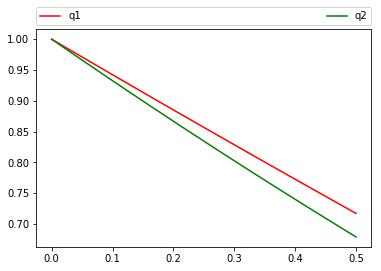

In [15]:
import matplotlib.pyplot as plt


plt.plot(t,y1,'r', label="q1")
plt.plot(t,y2,'g', label="q2")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.show()

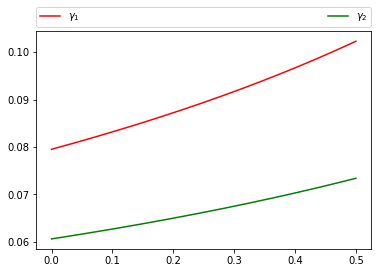

In [25]:
plt.plot(t,u1,'r', label="$\gamma_1$")
plt.plot(t,u,'g', label="$\gamma_2$")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.show()

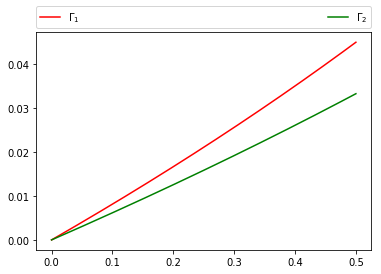

In [26]:
plt.plot(t,x1,'r', label="$\Gamma_1$")
plt.plot(t,x2,'g', label="$\Gamma_2$")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.show()